In [ ]:
# решение на tensorflow ,я так понял можно,и мне он больше нравится
# импорт нужных библиотек
import keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## подготовка датасета и задание 3

In [ ]:
# импортируем mnist
fm = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fm.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# задаем параметры для размера пачки(сколько изображений за раз будет подаваться модели)
# и количество эпох(сколько раз будет подан модели весь датасет)
# вообще все  модели начинают переобучаться раньше 10 эпохи,внизу на графике видно
# для первой оптимально 5-7 , для остальных 1-2
# 27.11.2023 был изменен только этот комментарий по поводу количества эпох
BATCH_SIZE = 10
NUM_EPOCHS = 5
# определяем размер входного слоя
input_shape = train_images[0].shape
# аугментация
# поэкпперементировав ,я оставился на этих 4 ,другие методы никак на итоговую точностьне влияли
# самыми полезными оказались переворачивание картинок по осям,они граюбт основную роль
aug = [tf.image.stateless_random_contrast,  # изменяет контраст
       tf.image.stateless_random_brightness, # затемняет
       tf.image.stateless_random_flip_left_right, # разворот картинки по горизонтали
       tf.image.stateless_random_flip_up_down] # разворот картинки по вертикали
# аргументы для функций аугментаций (вкратце не обьяснишь,но в целом задают силу изменений,не вероятность)
arg = [[0.2,0.5,(1,2)],[0.2,(1,2)],[(1,2)],[(1,2)]]
# на каждую аугментацию решил выделить по 5000 картинок
part = [0, 5000, 10000, 15000, 20000]
# собствено аугментация, я знаю что pep8 не рекомендует lambda фнукции, но она вроде вышла достаточно понятной
# aug , arf, part описаны чуть выше, x-картинка(массив numpy) в датасете
# вроде есть еще метод np.vectorize ,но что то он  не захотел работать(
'''
for i in range(4):
    func = lambda x: aug[i](x,*arg[i])
    # vstack = добавить по вертикали,то бишь в конец массива.
    train_images = np.vstack([train_images, func(train_images[part[i]:part[i + 1]])])
# а здесь по горизонтали, так как  измерение всего одно,просто числовые  метки
train_labels = np.hstack([train_labels, train_labels[part[0]:part[-1]]])
'''

NameError: ignored

## смотрим данные

In [ ]:
'''
plt.figure(figsize=(15,8))
for i in range(20):
    plt.subplot(4,5,1+i)
    plt.imshow(test_images[i])
    plt.title(class_names[test_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.grid(False)
plt.show()
'''

## модели

### задание 1 - модель на линейной регрессии
#### Total params: 771270
#### без предобработки данных точность около 85(83-87)
#### со скалированием (1/255) точность доходит до 89 ,но не стабильно
#### с аугментацией точность около 88-89 стабильно,но выше не поднималась(

In [ ]:
'''
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(28**2, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(196, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])
'''



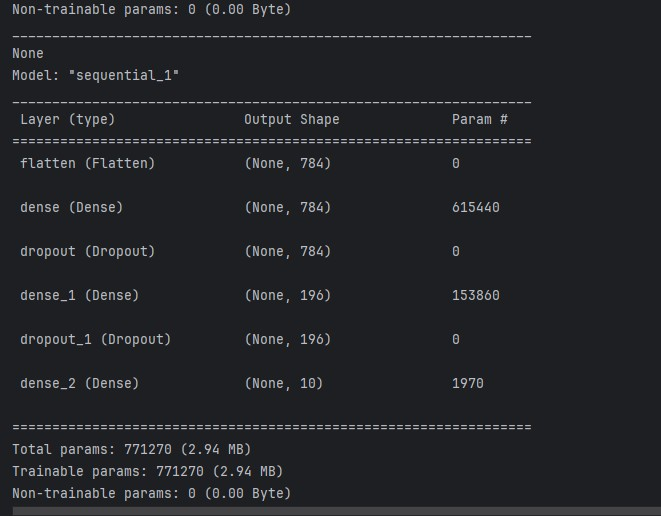

#### тестировалось на 30 эпохах,в среднем к 10 уже начинается переобучение, так что остановился на 10.
##### 1 график без аугментации,второй с аугментацией

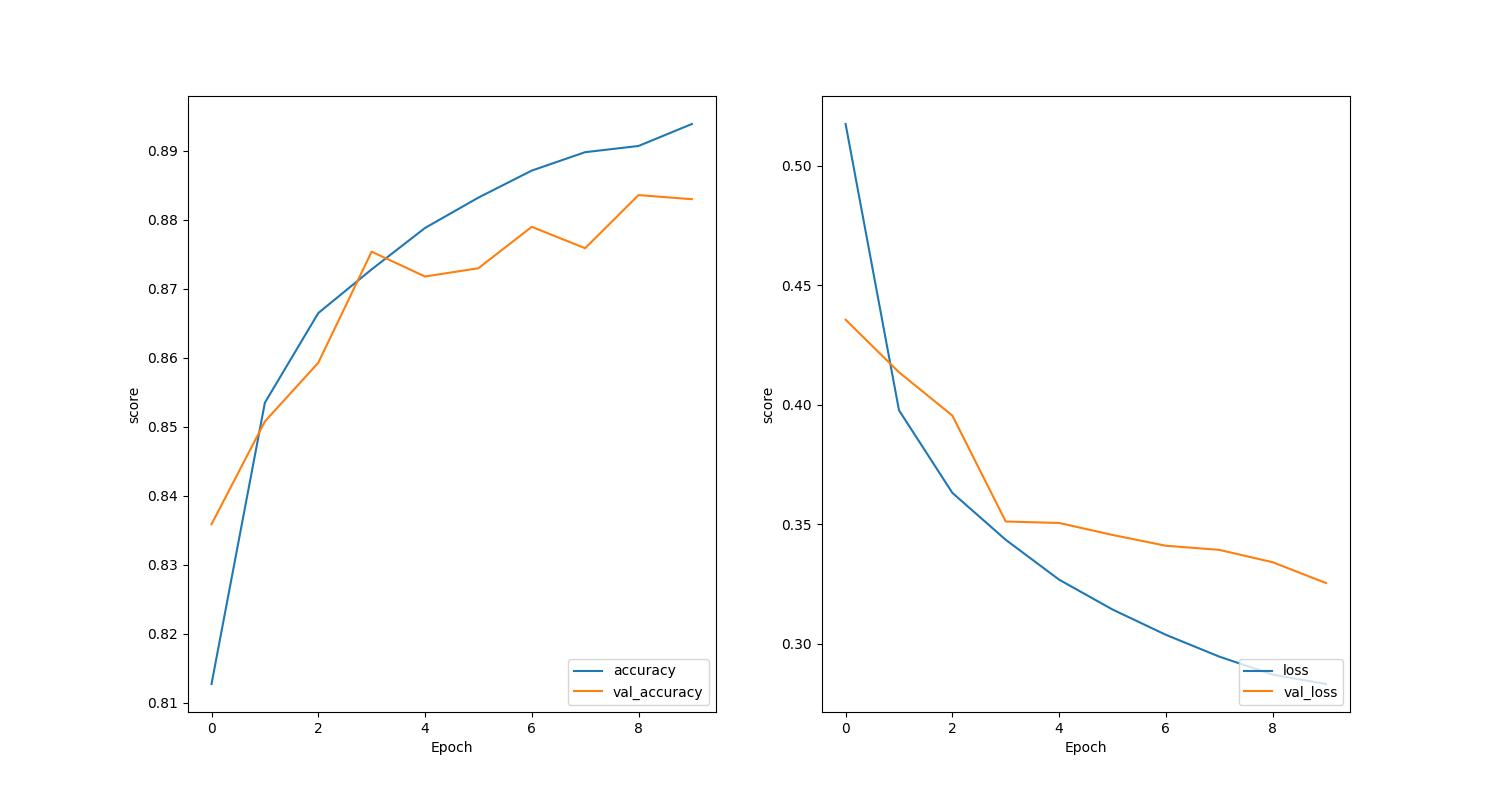

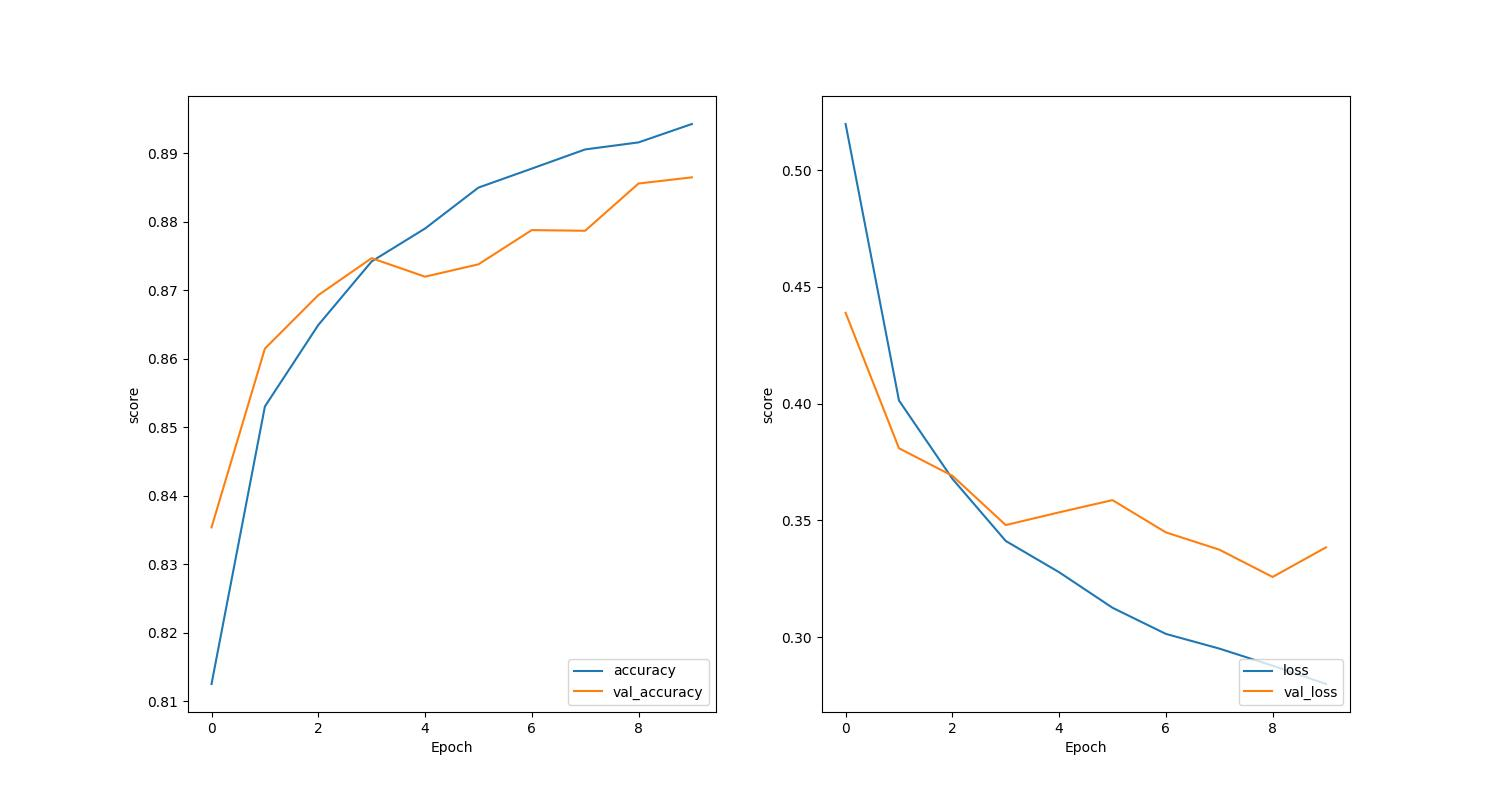

###задание 2 - модель на conv2d
####Total params: 667914
####без предобработки данных точность около 87(84-89)
####со скалированием (1/255) точность доходит до 91 ,но не стабильно
####с аугментацией точность около 90-92 стабильно,но выше не поднималась(

In [ ]:
'''
model = tf.keras.Sequential([
    layers.Conv2D(64, 3, input_shape=(*input_shape, 1), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(800, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

'''



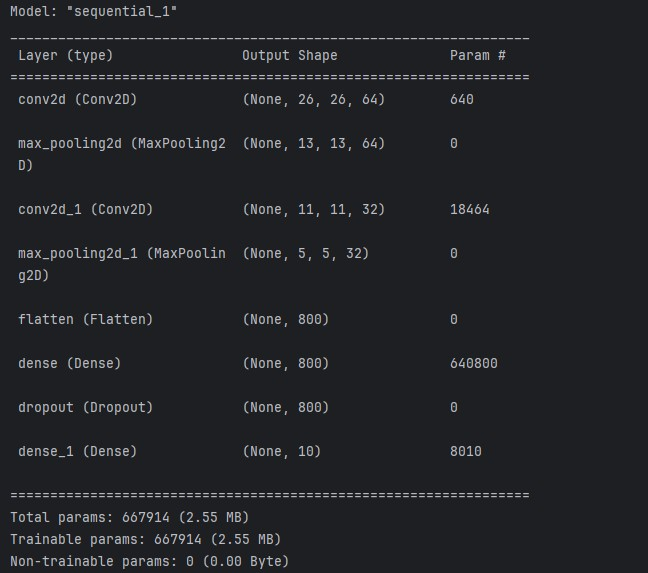

#### тестировалось на 30 эпохах,в среднем к 7 уже начинается переобучение.особенно заметно на графике с аугментацией.
##### 1 график без аугментации,второй с аугментацией

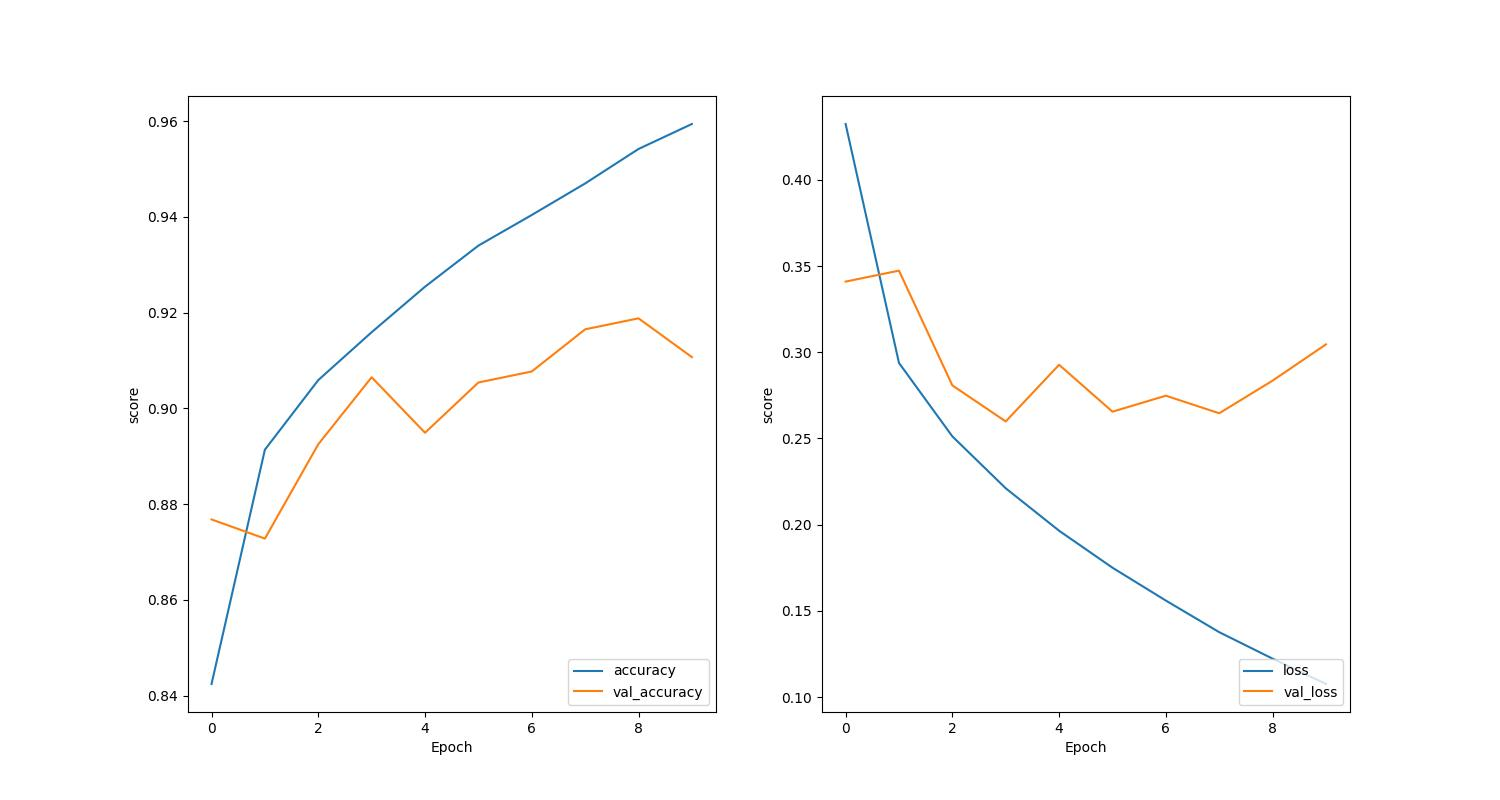

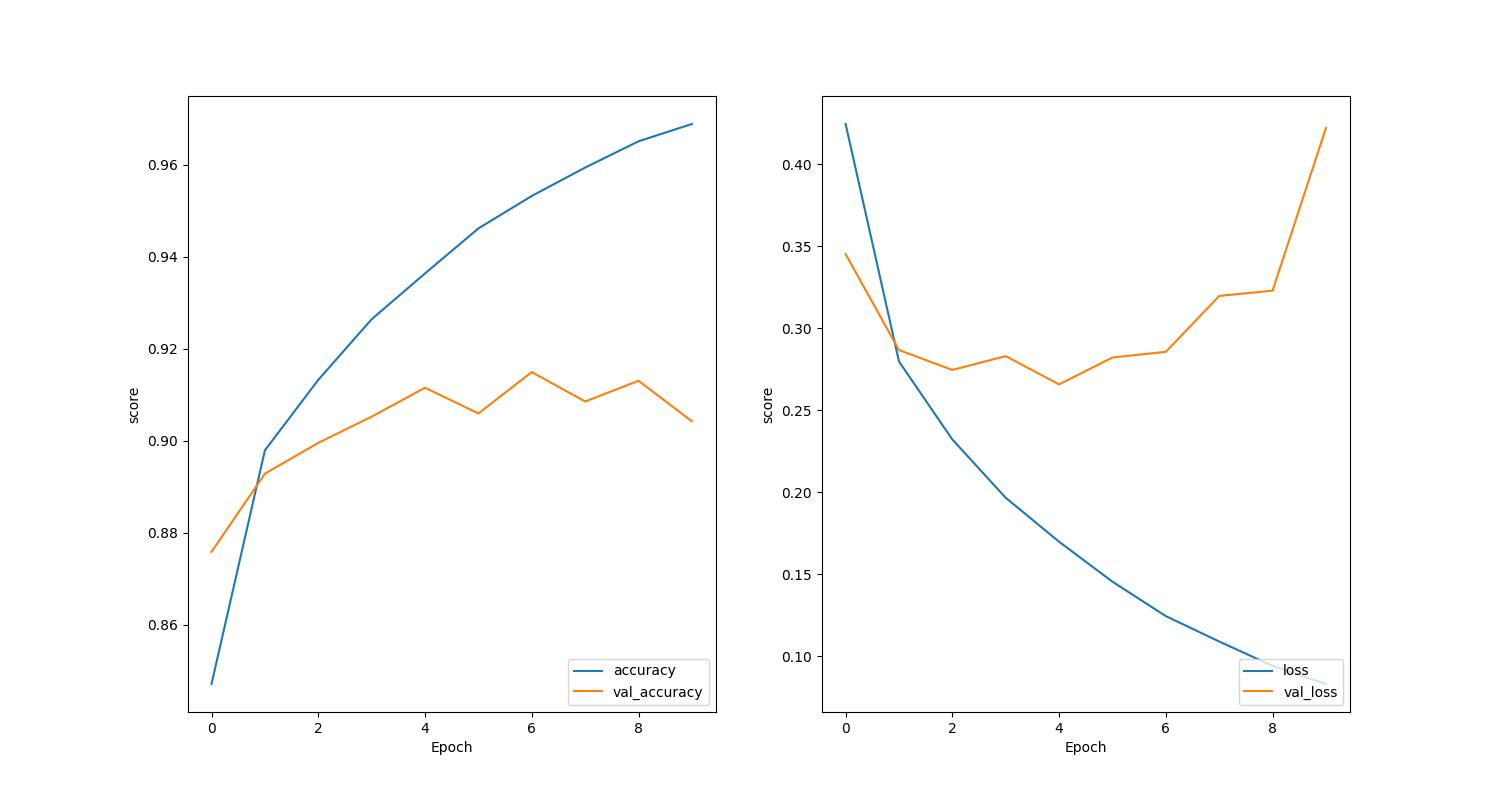

###задание 4 - skip-connection
#### надеюсь я правильно понял что посути в основе лежит передача результата предыдущего слоя + результата из ранеее идущего слоя с такой же размерностью на выходе(то есть буквально их сумма)
#### за основу взял архитектуру U-net и упростил(вначале написал как в лекции,но тренировать это пришлось бы сутки наверное,у меня на одну эпоху ушло около 3 часов,а результат был около 0.88 и затем только снижался) ,и на эпоху уходит около 4-5 минут.
####без предобработки данных точность около 86 стабильно
####со скалированием (1/255) точность доходит до 90 , стабильно
####с аугментацией точность около 90-91 стабильно,но выше не поднимается,что бы я не делал,подозреваю просто нужно обработать данные лучше,но время уже поджимает

In [ ]:
def skipconn_model():
    inp = layers.Input((*input_shape, 1))

    conv1 = layers.Conv2D(3, 3, activation='relu', padding='same')(inp)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)
    conv2 = layers.Conv2D(6, 3, activation='relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)
    conv3 = layers.Conv2D(12, 3, activation='relu', padding='same')(pool2)
    conv4 = layers.Conv2D(24, 3, activation='relu', padding='same')(conv3)

    up = layers.Conv2D(12, 3, activation='relu', padding='same')(conv4)
    merge1 = layers.concatenate([conv3, up])
    up1 = layers.UpSampling2D(size=(2, 2))(merge1)
    up1 = layers.Conv2D(6, 3, activation='relu', padding='same')(up1)
    merge2 = layers.concatenate([conv2, up1])
    up2 = layers.UpSampling2D(size=(2, 2))(merge2)

    up3 = layers.Conv2D(3, 3, activation='relu', padding='same')(up2)
    merge3 = layers.concatenate([conv1, up3])
    up4 = layers.UpSampling2D(size=(2, 2))(merge3)

    up4 = layers.Conv2D(3, 3,activation='relu',padding='same')(layers.UpSampling2D(size=(2, 2))(up4))
    up4 = layers.Conv2D(1, 3,activation='relu', padding='same')(up4)
    up4 = layers.Flatten()(up4)
    dense1 = layers.Dense(400, activation='relu')(up4)
    output_net = layers.Dense(10, activation='softmax')(dense1)
    skip_model = keras.Model(inputs=inp, outputs=output_net)
    return skip_model


model = skipconn_model()


#### тестировалось на 10 эпохах,в среднем к 5 уже начинается переобучение.на графике с аугментацией так вообще после 1 же эпохи.
##### 1 график без аугментации,второй с аугментацией

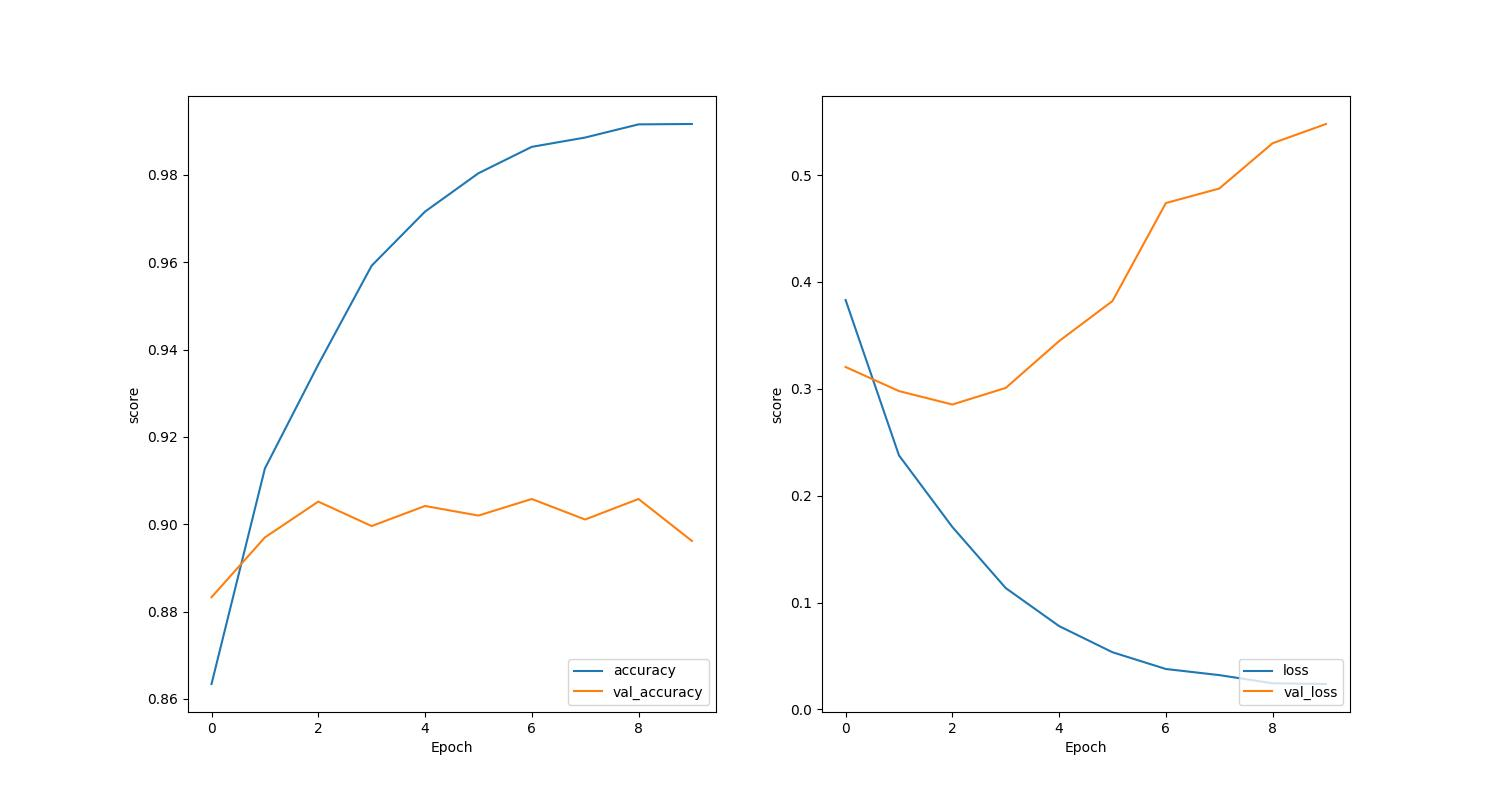

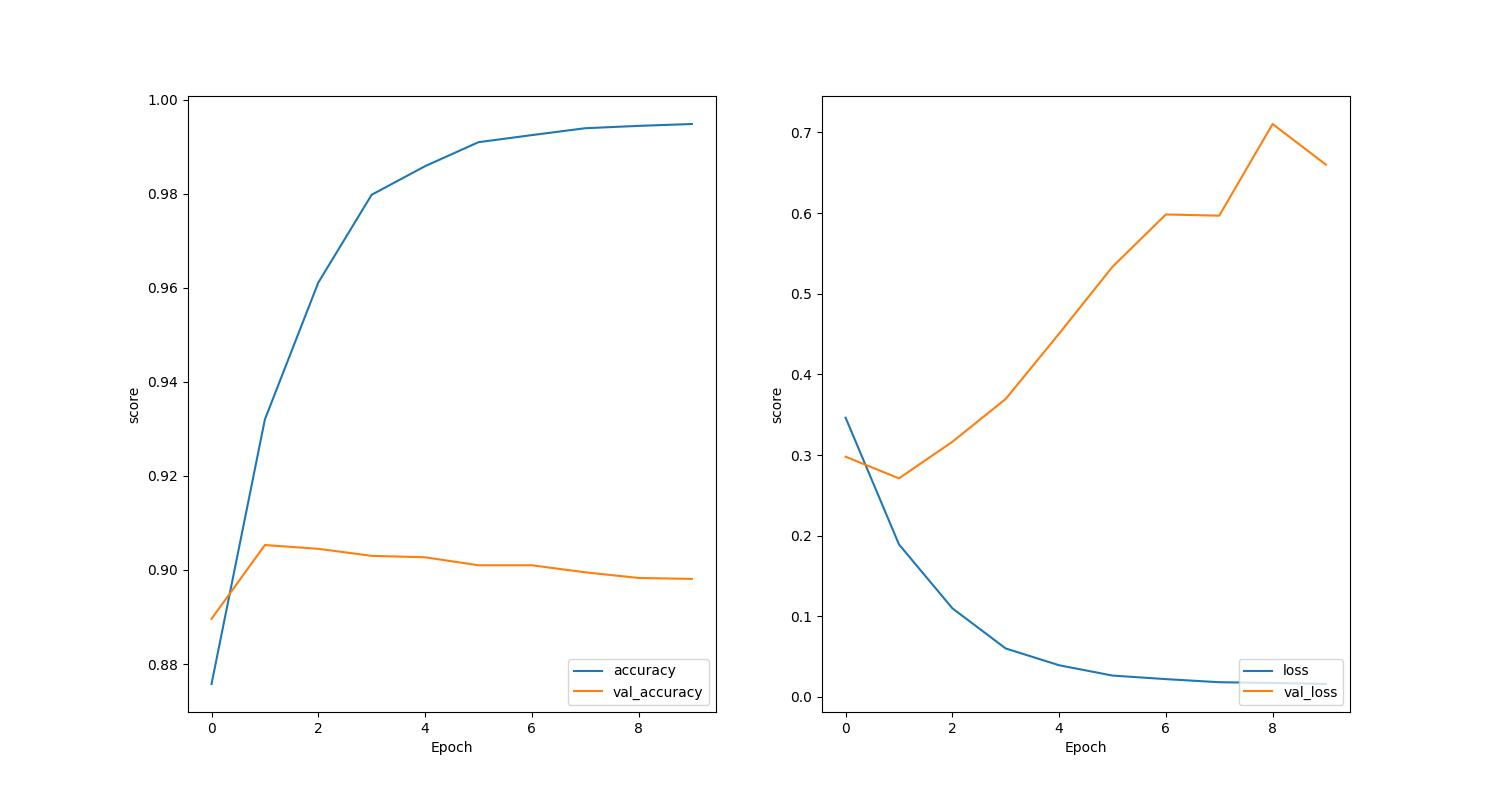

### определение лосса и тренировка

In [ ]:
#параметры модели
print(model.summary())
#  настройка функции лосса и learning rate
# мне понравился adam ,модификация sdg, которыйц учитывает  все предыдущие шаги
# еще неплохо смотрелся adagrad .концепция изменения lr
# в зависимости от лосса (нужно ли уменьшать или оставить) мне прям по душе
# lr  в своем роде перестает быть гиперпараметром(да мы задаем его в начале,
# но он ведь меняется в ходе обучения,а значит уже не гиперпараметр)
# но к сожалению adagrad показал себя хуже,слишком быстро замедляется темп обучения
# а если брать lr выше то чаще промахивается с поиском локального минимума и результат резко хуже становится точность.
# по умолчанию lr = 0.001
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_data=(test_images, test_labels))

## сохранение  лосса и метрик

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.savefig('./model4_0.jpg')


## выводы:
###  ну в целом я не ожидал что обычный conv2d покажет себя лучше чем супер сложный u-net ,но зато пришло понимание что супер сложная модель не всегда хорошо,и модель надо создавать под конкретную задачу ,а не просто самую крутую,начинаешь понимать насколько сложно было создать какой нить универсальный chatgpt,который хорош практически во всем
### еще долго пришлось бодаться со skip-connect ,что бы слои после UpSampling нормально сопоставлялись.(можно максимум 2 раза использовать MaxPool так как 28/2=14 , 14/2=7 ,а 7/2= 3, в итоге при USampling получались 3*2=6 и 6*2 =12 соотвественно ниже 7 брать уже нельзя.
### так что либо так либо через resize, и я выбрал первый вариант так как тестировать с resize это все уже времени не хватит.
### вообще было бы неплохо их сравнить в задаче классификации с 50 классами например,сдается мне обычный conv2d уже не будет так хорош.
###
### просьба даже если все хорошо и мне дадут макс балл дать обратную связь верно я рассуждал или нет и где есть промашки.
### UPD 29/11/2023: вывод по заданию 1 -линейка в целом неплохо справилась,но явно не может выявить сложные взаимосвязи,а если раздувать модель  то она слишком быстро переобучается и падает в какой то из локальных минимум(точностсь от 77 до 84), что хуже написанной мной модели
### я пробовал 5 типов моделей:
### 1.нарастание ,затем уменьшение количества нейронов
### 2.нарастание ,затем резкий переход от 2000 к 10
### 3. оставить как есть ,затем нарастить,затем уменьшить
### 4. оставить как есть затем уменьшить
### 5. постепеннное уменьшение до 10
### в ходе этих экспериментов отметил следующее:
### лучше всего подбирать количество нейронов кратное предыдущему слою, если брать рандомные цифры модель чаще выдает больший лосс
###  лучше всего показали себя 4 и 5 типы , соотвественно модели решил сделать по 5 типу.но здесь надо еще тестировать на моделях с меньшим числом входных нейронов,из за 28**2 параметров на входе модель очень быстро раздувается ,и при этом начинает очень быстро переобучаться(протестировано на модели с 1.564.708 параметрами) тест  точность была около 79-80%.